In [1]:
import pandas as pd
import numpy as np


In [4]:
df= pd.read_csv('/content/heart.csv')

In [5]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
def missing_data_profile(df):
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100

    missing_df = pd.DataFrame({
        "Missing_Count": missing_count, "Missing_Percentage": missing_percentage
    })
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df = missing_df.sort_values(by="Missing_Percentage", ascending=False)
    return missing_df

missing_summary = missing_data_profile(df)
missing_summary
print(missing_summary)

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

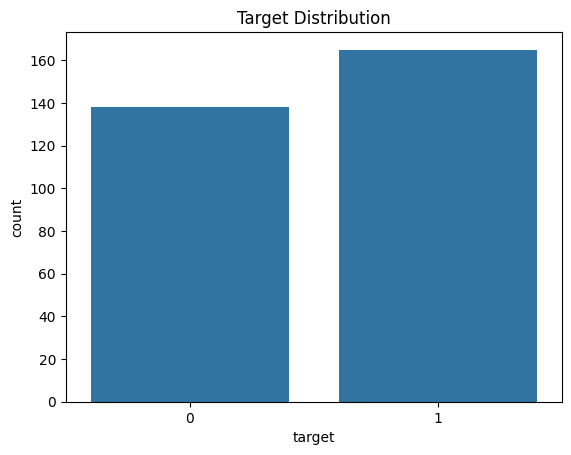

In [13]:
import pandas as pd
df= pd.read_csv('/content/heart.csv')
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

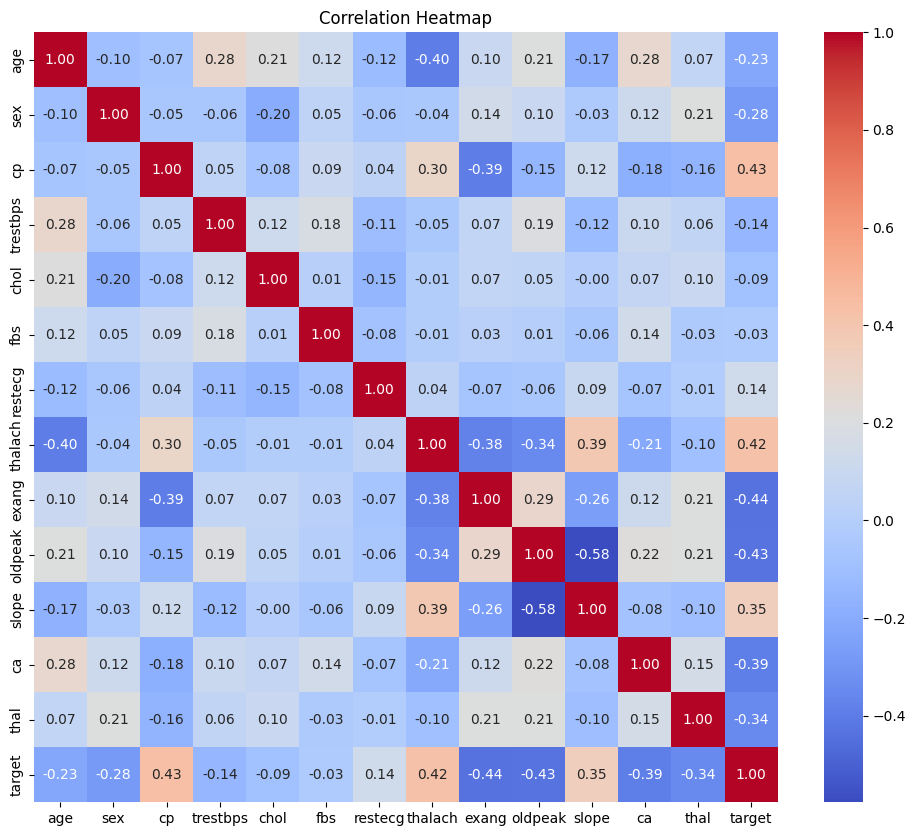

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

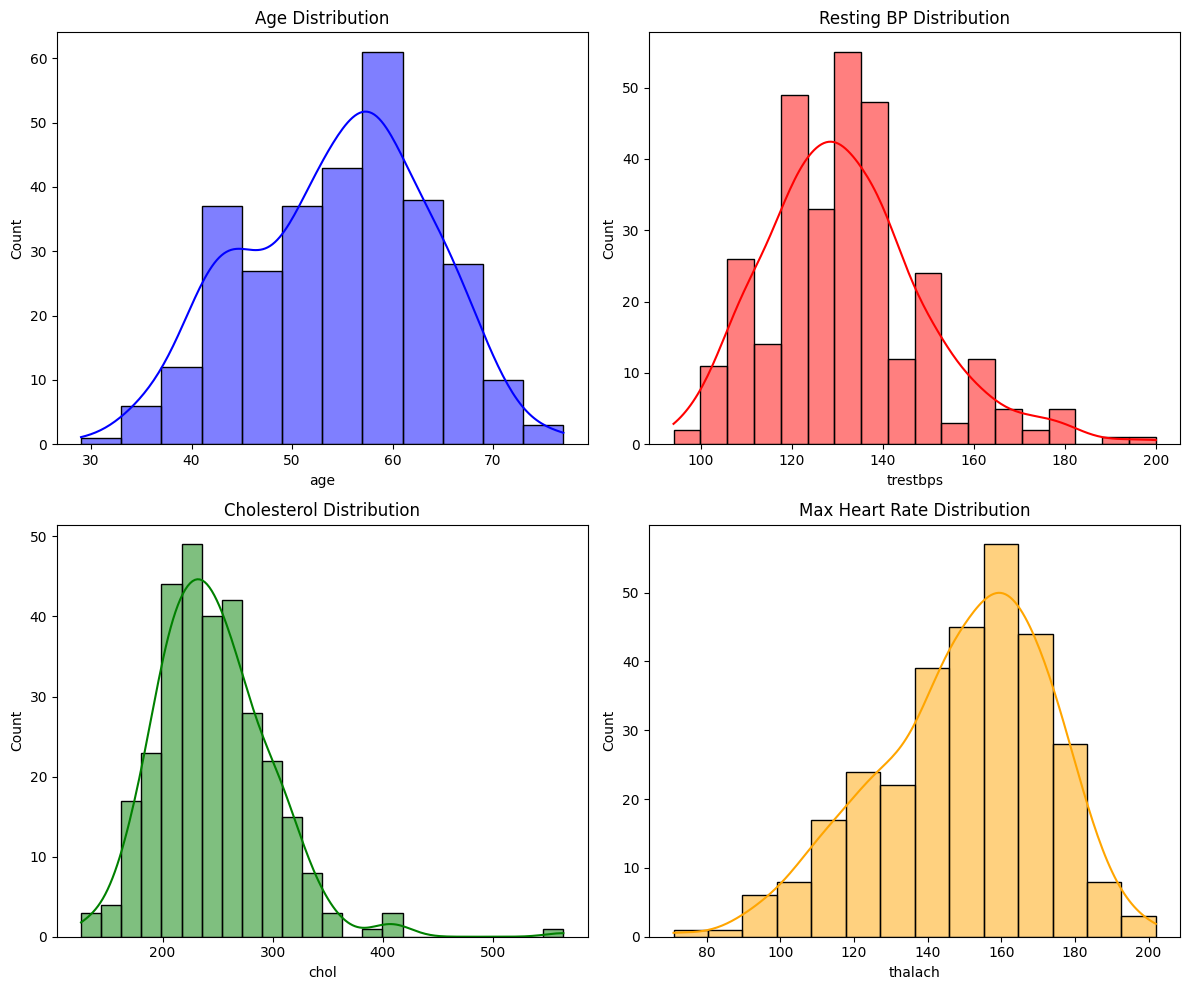

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['age'], kde=True, ax=axes[0, 0], color='blue').set_title('Age Distribution')
sns.histplot(df['trestbps'], kde=True, ax=axes[0, 1], color='red').set_title('Resting BP Distribution')
sns.histplot(df['chol'], kde=True, ax=axes[1, 0], color='green').set_title('Cholesterol Distribution')
sns.histplot(df['thalach'], kde=True, ax=axes[1, 1], color='orange').set_title('Max Heart Rate Distribution')
plt.tight_layout()
plt.savefig('numerical_distributions.png')

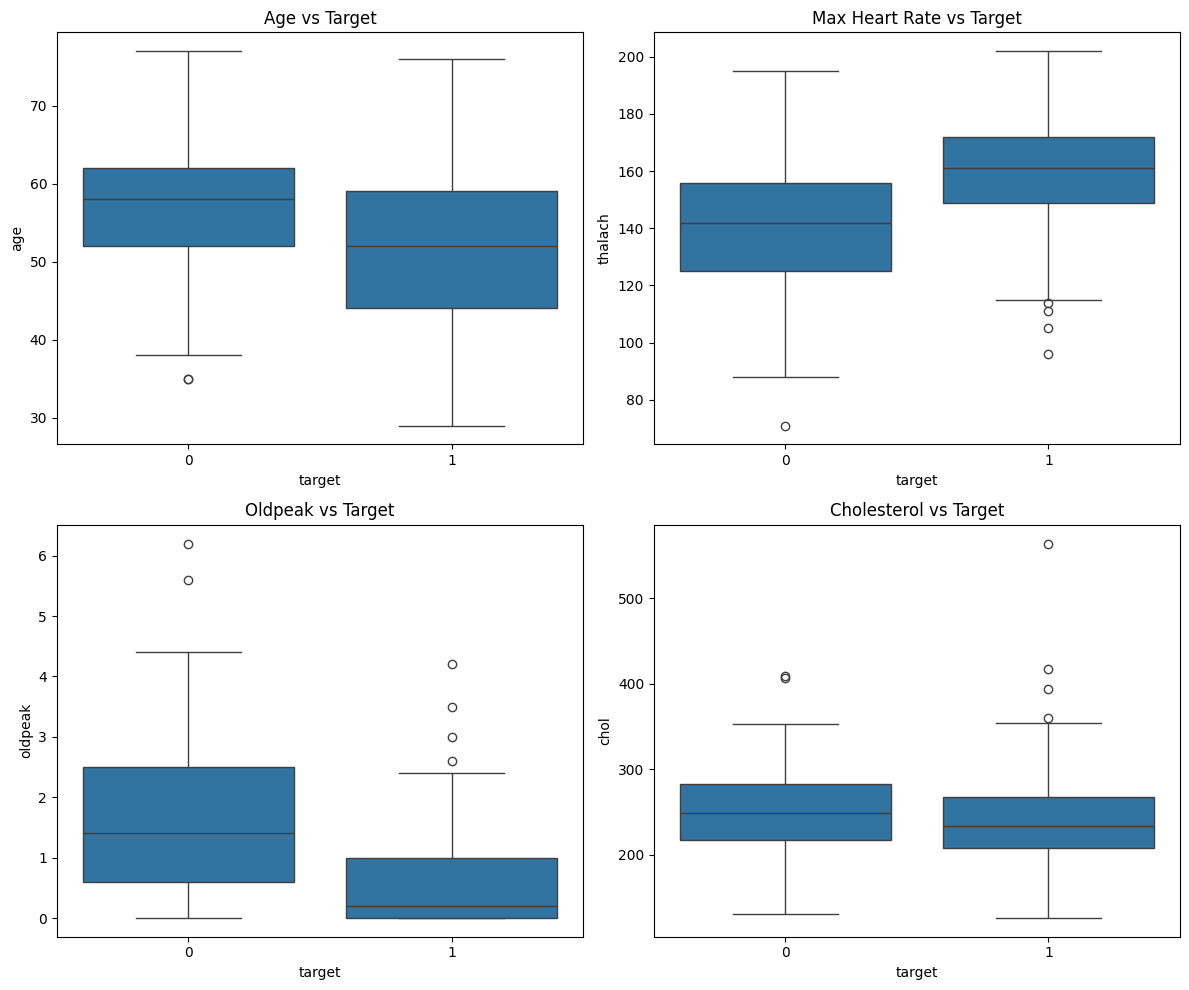

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='target', y='age', data=df, ax=axes[0, 0]).set_title('Age vs Target')
sns.boxplot(x='target', y='thalach', data=df, ax=axes[0, 1]).set_title('Max Heart Rate vs Target')
sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[1, 0]).set_title('Oldpeak vs Target')
sns.boxplot(x='target', y='chol', data=df, ax=axes[1, 1]).set_title('Cholesterol vs Target')
plt.tight_layout()
plt.savefig('boxplots_vs_target.png')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [18]:
# Identify categorical and continuous columns
# Categorical (based on dataset description)
cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
# Continuous
cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create dummy variables for categorical features
df_final = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Define X and y
X = df_final.drop('target', axis=1)
y = df_final['target']

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the continuous features
scaler = StandardScaler()
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_test[cont_cols] = scaler.transform(X_test[cont_cols])

# Build Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8689

Confusion Matrix:
[[23  5]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/tmp/ipython-input-1439143868.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette='magma')


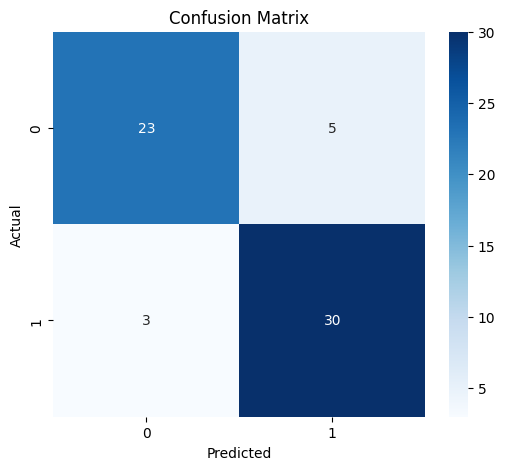

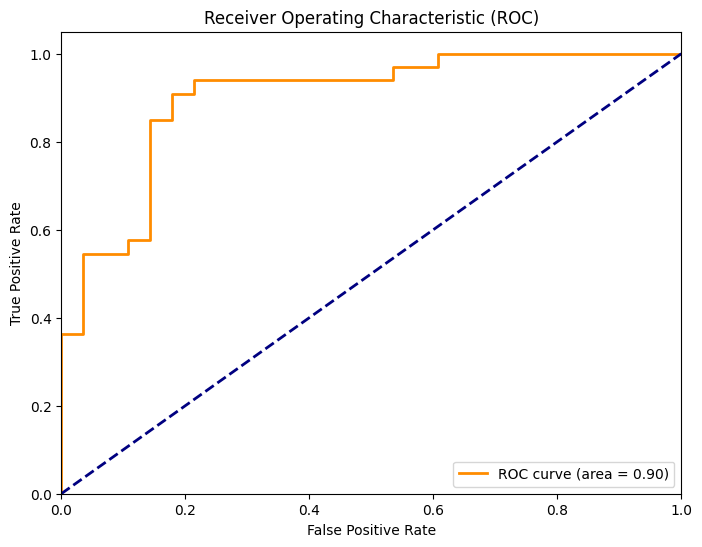

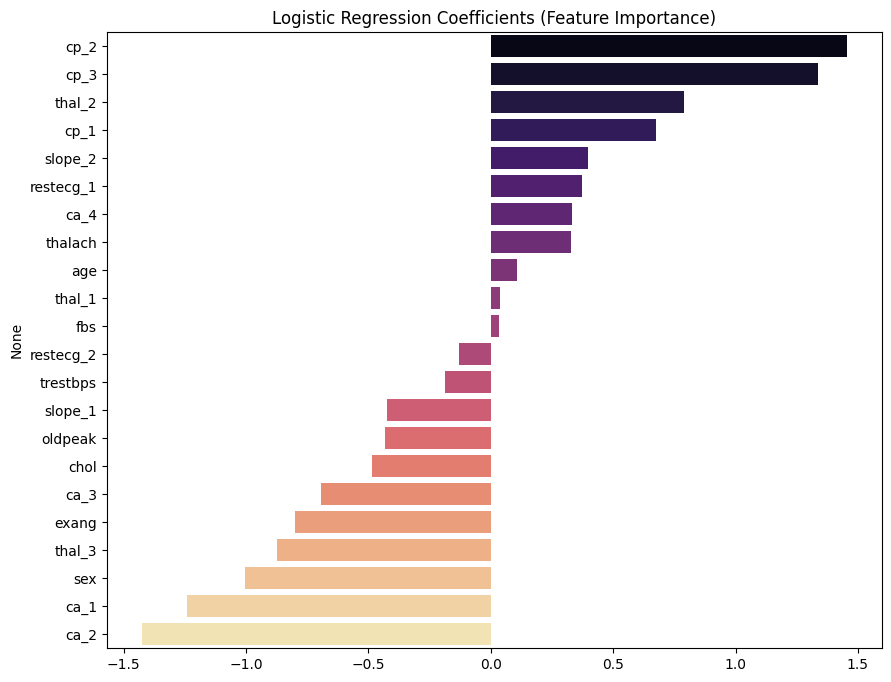

In [20]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')

# Feature Importance (Coefficients)
coefficients = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.values, y=coefficients.index, palette='magma')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.savefig('feature_importance.png')